# Objective: Match Kravtsov's BCGs to objects in RedMaPPer

* In this notebook, we first use the `astropy` function `match_catalog_to_sky` to find the overlap between Kravtsov's BCGs and our `RedMaPPer` sample. The RA/Dec of the sources from Kravtsov were hand-picked from SDSS DR13. Our finalized coordinates are available on our GutHub in an `ecsv` file.

    * [SDSS DR13](http://skyserver.sdss.org/dr13/en/tools/chart/navi.aspx)
    * [Finalized Coordinates](https://github.com/moustakas/siena-astrophysics/blob/masscompare/research/massivepilot/kravsources.ecsv)


* We then compare the stellar masses (M*) of the matching sources.

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from astropy.io.ascii import read
from astropy.coordinates import SkyCoord
from astropy import units as u
import fitsio
import seaborn

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [45]:
# Reading in all necessary files and data
rmpath = os.path.join(os.sep, 'global', 'work', 'projects', 'redmapper')
rmcatfile = os.path.join(rmpath, 'redmapper_isedfit_v5.10_centrals.fits.gz')
kravsources = os.path.join(os.sep, 'home','kjnapes', 'siena-astrophysics', 'research', 'massivepilot',
                           'kravsources.txt')
rminfo = fitsio.FITS(rmcatfile)
rmcat = rminfo[1].read(columns=['Z', 'RA', 'DEC', 'MSTAR_50', 'MSTAR_AVG', 'MSTAR_ERR'])
sourceRA, sourceDEC, helioZ = np.loadtxt(kravsources, unpack=True, usecols=(1,2,3))
name = np.genfromtxt(kravsources, dtype='U', usecols=0)

In [55]:
# Cross-matching catalogs
rcoord = SkyCoord(ra=rmcat['RA']*u.degree, dec=rmcat['DEC']*u.degree)
kravcoord = SkyCoord(ra=sourceRA*u.degree, dec=sourceDEC*u.degree)
idx, sep2d, dist3d = kravcoord.match_to_catalog_sky(rcoord, nthneighbor=1)

# Applying a limiting tolerance to matches
gd = np.where(sep2d < 30 * u.arcsec)[0]

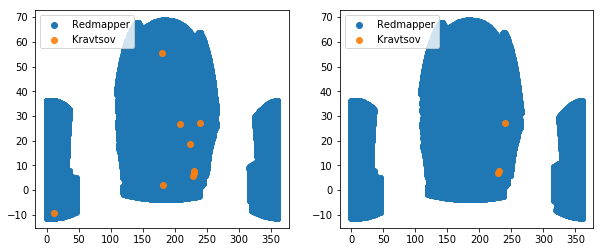

In [50]:
# Taking a look at the overlap between matches
fig = plt.figure(figsize(10,4))

ax2 = fig.add_subplot(121)
ax2.scatter(rmcat['RA'], rmcat['DEC'], label='Redmapper')
ax2.scatter(sourceRA, sourceDEC, alpha=0.9, label='Kravtsov')
ax2.legend(loc='upper left')

ax1 = fig.add_subplot(122)
ax1.scatter(rmcat['RA'], rmcat['DEC'], label='Redmapper')
ax1.scatter(sourceRA[gd], sourceDEC[gd], alpha=0.9, label='Kravtsov')
ax1.legend(loc='upper left')

In [57]:
# Looking at the indices and properties of the matches. 
print(gd)
print(name[gd])
print(rmcat['RA'][idx[gd]])
print(rmcat['DEC'][idx[gd]])
print(rmcat['Z'][idx[gd]]) # The redshifts are a little off...
print(rmcat['MSTAR_50'][idx[gd]])
print(rmcat['MSTAR_AVG'][idx[gd]])
print(rmcat['MSTAR_ERR'][idx[gd]])

[0 4 5]
["'A2142'" "'MKW3s'" "'A2052'"]
[ 239.58332907  230.46604816  229.18537268]
[ 27.23341292   7.70881574   7.02162407]
[ 0.09577668  0.06400454  0.05806554]
[ 12.03588104  12.04784679  10.70101738]
[ 12.00933456  12.06140423  10.70101643]
[ 0.06717658  0.02627182  0.        ]
